# Abnormal HbA1c Results During COVID-19

This notebook describes deviations in HbA1c test results during the COVID-19 pandemic at large and by specific demographic groups. The following measures are reported: 
1. Absolute count of abnormal results (by age, sex, region, IMD, and diabetes type)
2. Percentage of abnormal results of total number of tests taken (by age, sex, IMD, and diabetes type)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import measures
def import_df(f_path):
    df = pd.read_csv("../output/data/{}.csv".format(f_path))
    # Create percent of population
    df['pct'] = df['value']*100
    return df

# Create charts
def create_chart(measure, ylabel, group, df):
    plt.figure(figsize = (15,8))
    if group=='population':
        ax = sns.lineplot(x = 'date', y = measure, data = df)
    else:
        ax = sns.lineplot(x = 'date', y = measure, hue = group, data = df)
    locs, labels = plt.xticks()
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.setp(labels, rotation=65)
    plt.show()

In [5]:
# Dataframes
df_pop = import_df('measure_hba1c_abnormal')
df_dm = import_df('measure_hba1c_abnormal_by_diabetes_type')
df_sex = import_df('measure_hba1c_abnormal_by_sex')
df_age = import_df('measure_hba1c_abnormal_by_age')
df_region = import_df('measure_hba1c_abnormal_by_region')
df_imd = import_df('measure_hba1c_abnormal_by_imd')

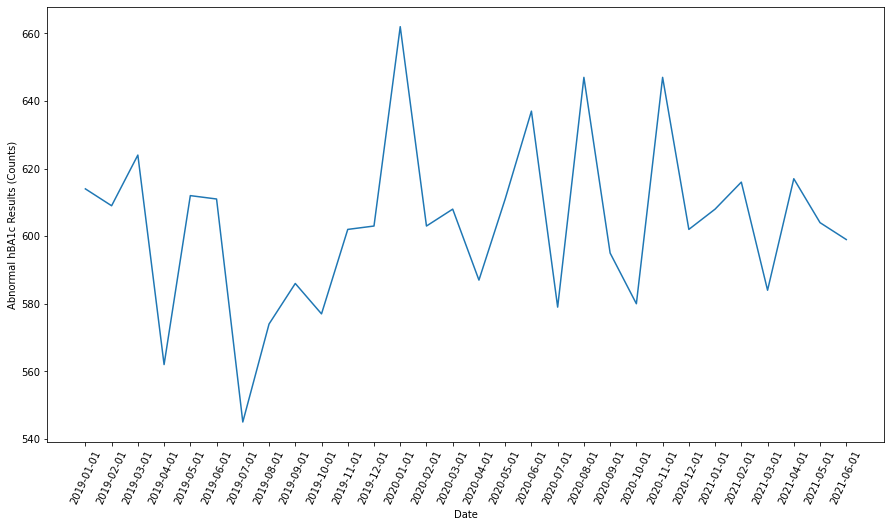

In [8]:
### Absolute measure

# Population
create_chart('hba1c_abnormal', 'Abnormal hBA1c Results (Counts)', 
             'population', df_pop)

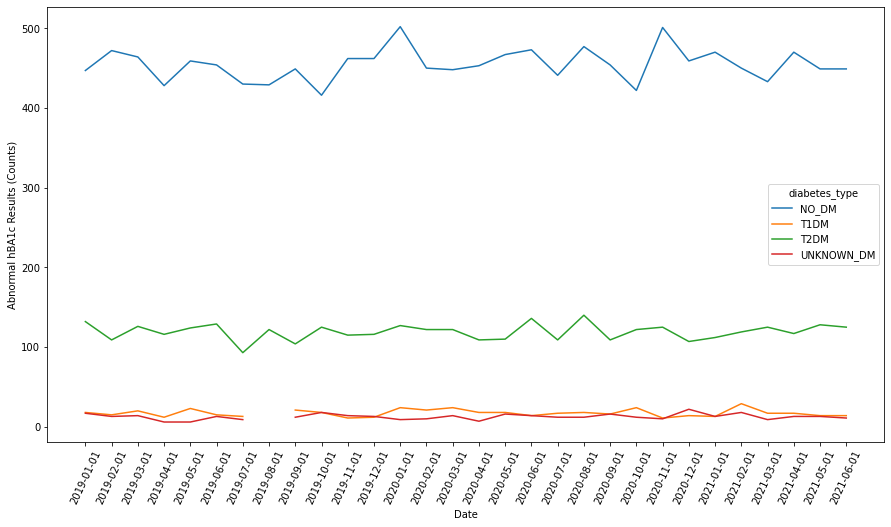

In [9]:
# Diabetes type
create_chart('hba1c_abnormal', 'Abnormal hBA1c Results (Counts)', 
             'diabetes_type', df_dm)

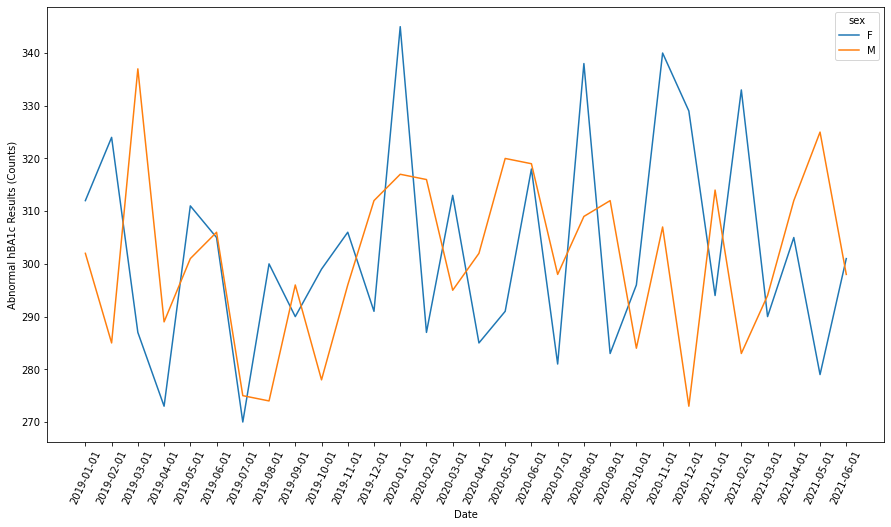

In [10]:
# Sex
create_chart('hba1c_abnormal', 'Abnormal hBA1c Results (Counts)',
             'sex', df_sex)

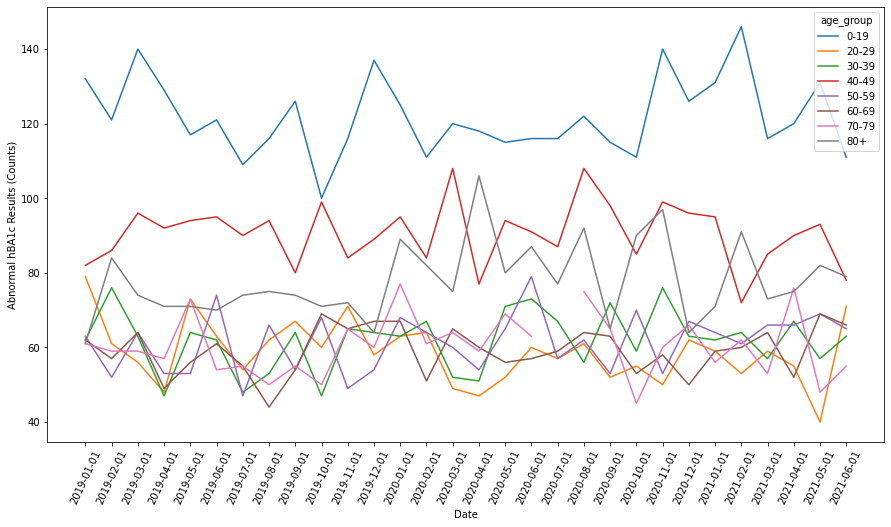

In [11]:
# Age
create_chart('hba1c_abnormal', 'Abnormal hBA1c Results (Counts)',
             'age_group', df_age.loc[df_age.age_group != 'missing'])

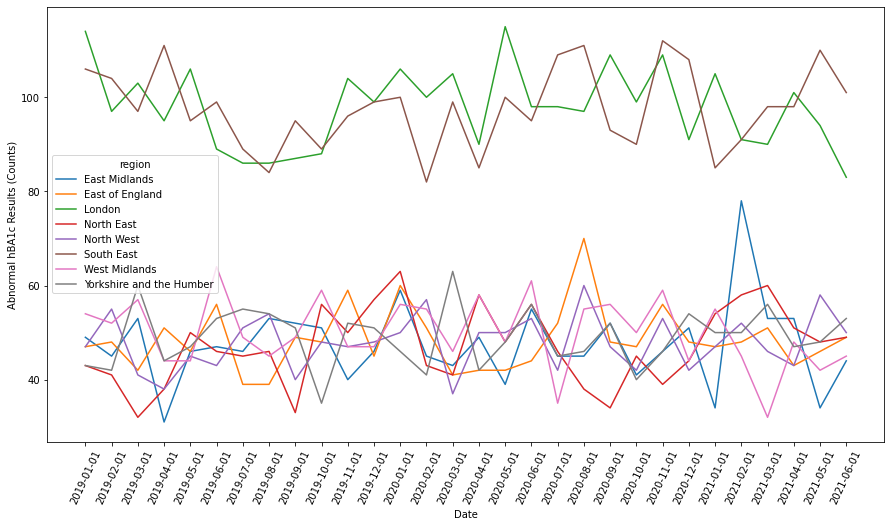

In [12]:
# Region
create_chart('hba1c_abnormal', 'Abnormal hBA1c Results (Counts)',
             'region', df_region)

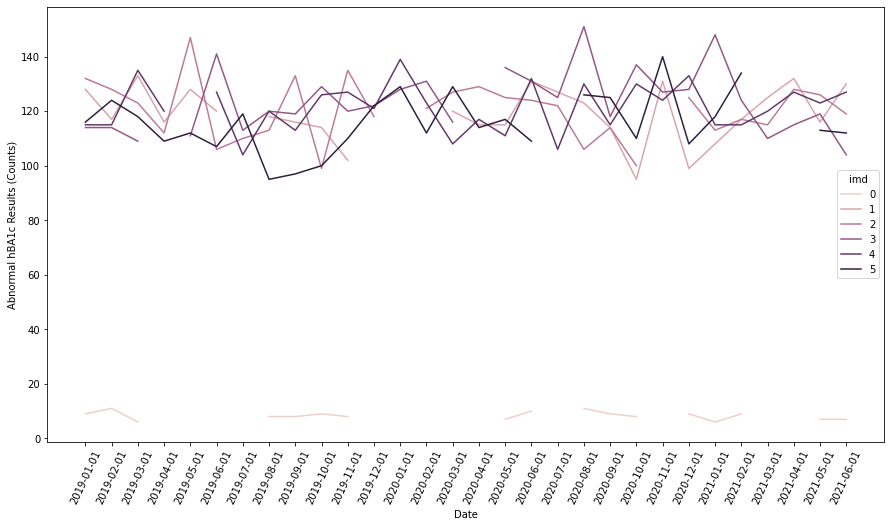

In [13]:
# Region
create_chart('hba1c_abnormal', 'Abnormal hBA1c Results (Counts)',
             'imd', df_imd)

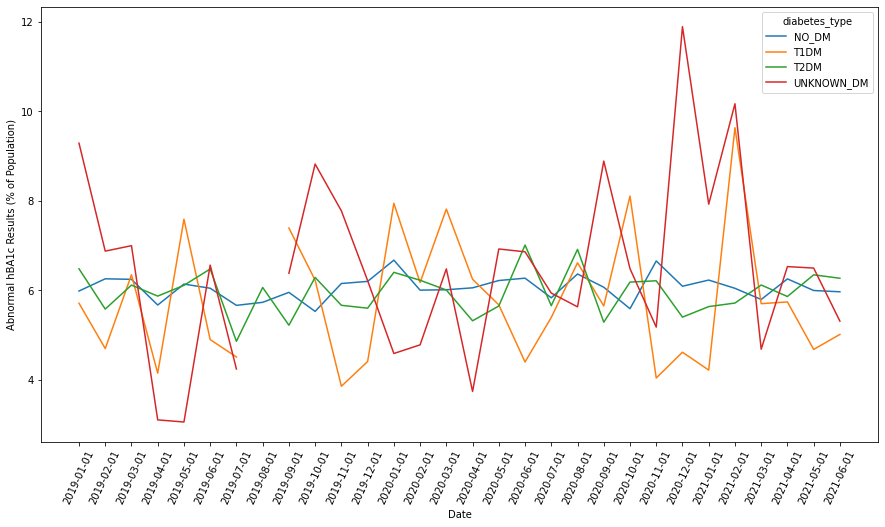

In [14]:
### Percentage of population

# Diabetes type
create_chart('pct', 'Abnormal hBA1c Results (% of Tests)', 
             'diabetes_type', df_dm)

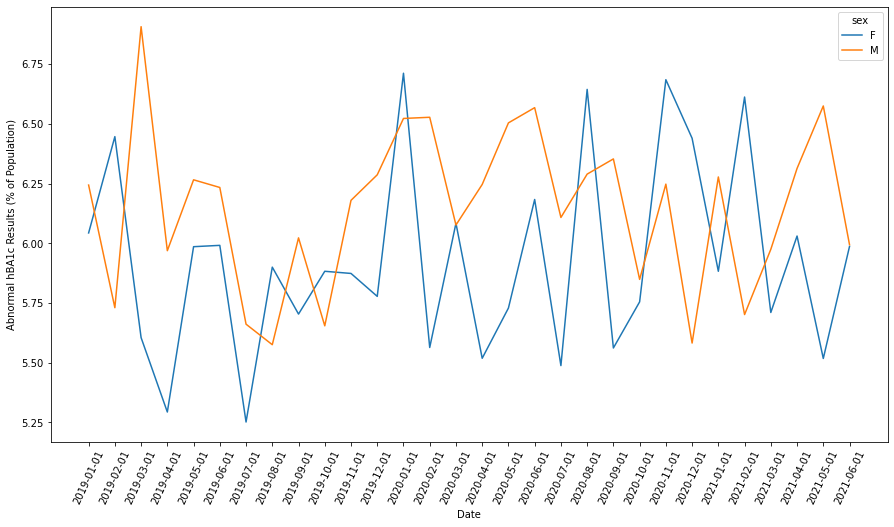

In [15]:
# Sex
create_chart('pct', 'Abnormal hBA1c Results (% of Tests)',
             'sex', df_sex)

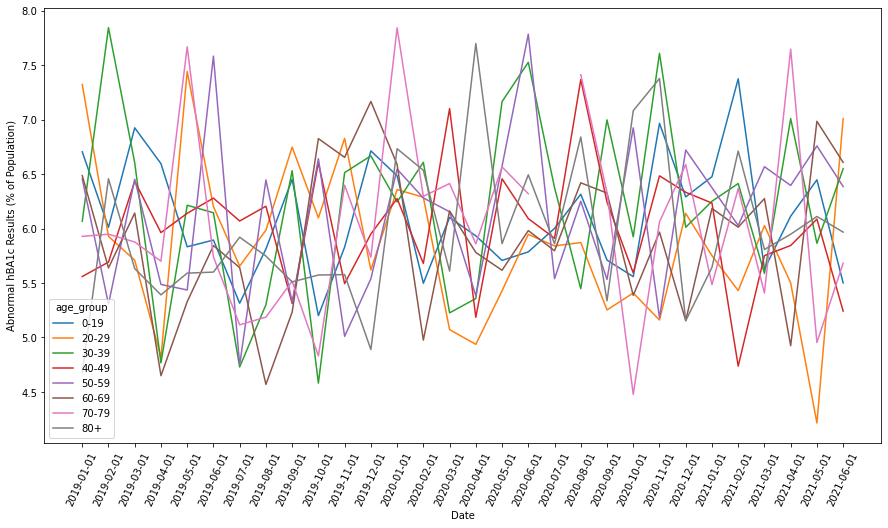

In [16]:
# Age
create_chart('pct', 'Abnormal hBA1c Results (% of Tests)',
             'age_group', df_age.loc[df_age.age_group != 'missing'])

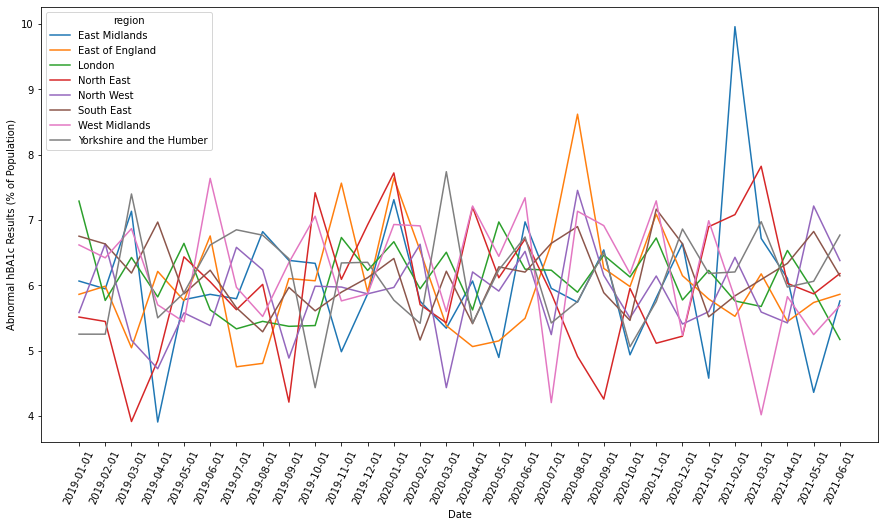

In [17]:
# Region
create_chart('pct', 'Abnormal hBA1c Results (% of Tests)',
             'region', df_region)

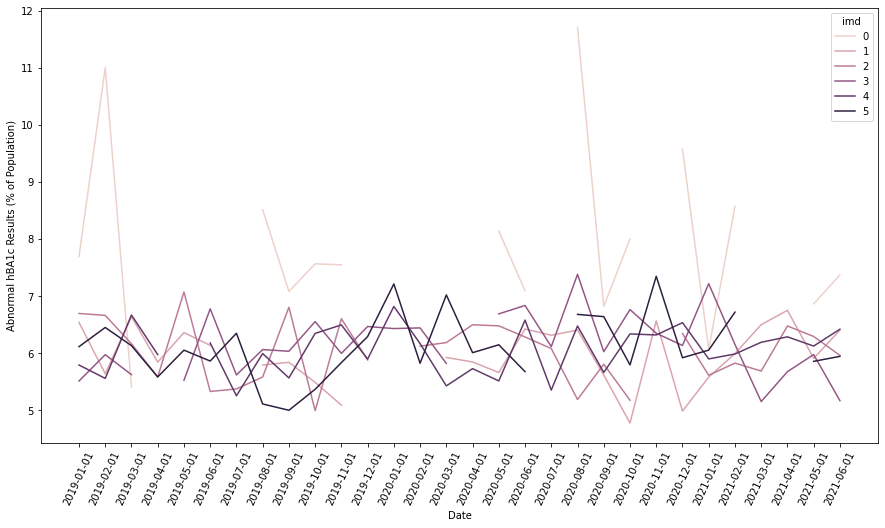

In [18]:
# IMD
create_chart('pct', 'Abnormal hBA1c Results (% of Tests)',
             'imd', df_imd)